In [47]:
#Data Loading and Exploration.
import pandas as pd
df = pd.read_csv('customer_churn_data.csv')

print("Dataset Shape : ", df.shape) #prints dataset shape.
print("Datatypes: ", df.dtypes) #prints the datatypes of each column.

print("Missing Values: ", df.isnull().sum()) #prints the number of missing values in each column.
df.dropna(inplace = True) # removes the missinng values from each row.

print("Summary Statistics: ", df.describe()) #prints the summary statistics like Count(number of missing values), mean, standard deviation and all of integer or float datatypes.


Dataset Shape :  (10000, 24)
Datatypes:  customer_id               object
age                        int64
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
internet_service          object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
contract                  object
paperless_billing         object
payment_method            object
monthly_charges          float64
total_charges            float64
customer_satisfaction      int64
support_calls              int64
churn                     object
dtype: object
Missing Values:  customer_id              0
age                      0
gender                   0
senior_citizen           0
partner                  0
d

churn
No     7728
Yes    2272
Name: count, dtype: int64


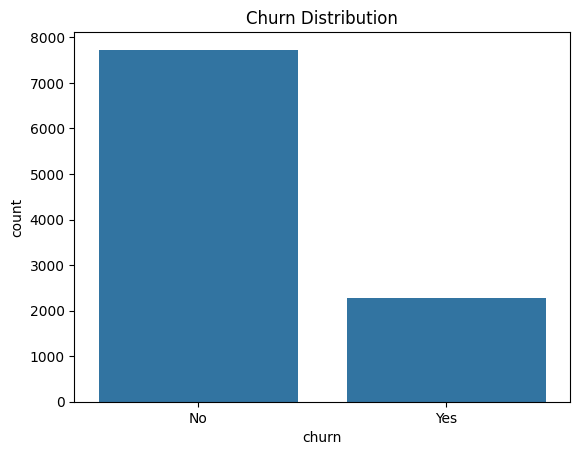

Churn rate is :  22.720000000000002


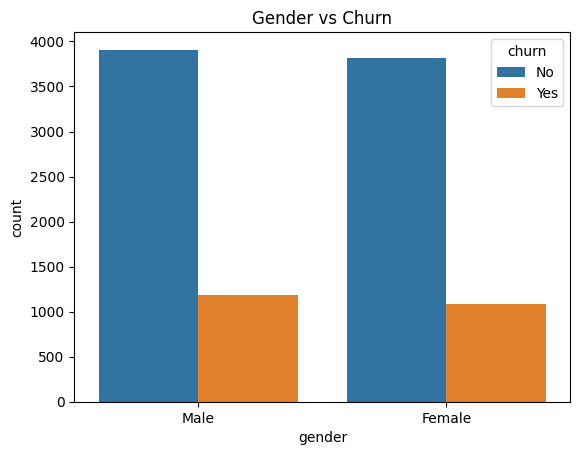

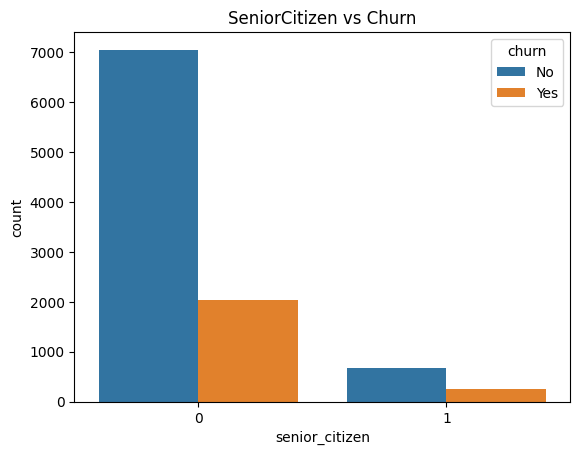

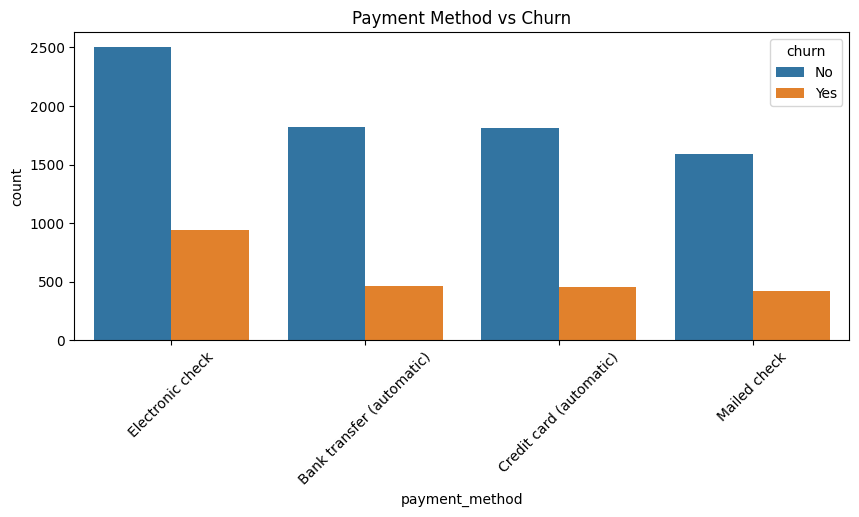

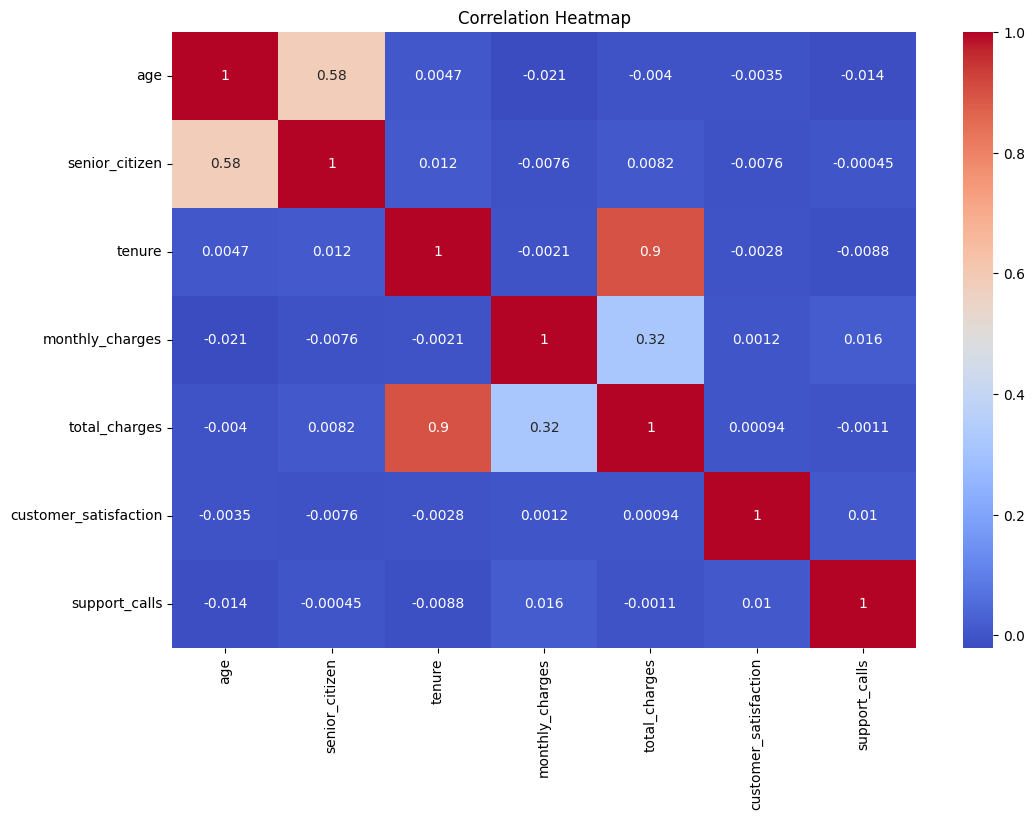

In [48]:
# Exploratory Data Analysis.
import seaborn as sns
import matplotlib.pyplot as plt

print(df["churn"].value_counts()) # prints number of people churned and not churned(churn -> people who stop using service or left.). churn distribution.
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

churn_rate = (df["churn"] == "Yes").mean() * 100 # churn rate(number of churned customers / total customers(mean) * 100)
print("Churn rate is : ", churn_rate)

# Different patterns on churn.
# 1) Gender vs Churn
sns.countplot(x='gender', hue='churn', data=df)
plt.title("Gender vs Churn")
plt.show()

# 2) Senior Citizen vs Churn
sns.countplot(x='senior_citizen', hue='churn', data=df)
plt.title("SeniorCitizen vs Churn")
plt.show()

# 3) Payment Method vs Churn
plt.figure(figsize=(10,4))
sns.countplot(x='payment_method', hue='churn', data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

# 4) Correlation Analysis Of Numeric Values.
numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [49]:
# Data Processing.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


categorical_cols = ['churn', 'gender', 'partner', 'dependents', 'phone_service',
                  'multiple_lines', 'internet_service', 'online_security', 'online_backup',
                  'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                  'contract', 'paperless_billing', 'payment_method']
numeric_cols = ["age", "tenure", "monthly_charges", "total_charges", "support_calls"]

# Encode Categorical Values.
encoder = LabelEncoder()
for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])

# Scale Numerical Values.
X = df.drop(['churn', 'customer_id'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
# Model Development
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Random Forest with Grid Search
rf = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=3)
rf_grid.fit(X_train, y_train)

# SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)

SVC(C=1)

In [51]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluation(name, model):
    y_prediction = model.predict(X_test)
    print(name + " " + "Performance : ")
    print("Accuracy : ", accuracy_score(y_test, y_prediction))
    print("Precision : ", precision_score(y_test, y_prediction))
    print("Recall : ", recall_score(y_test, y_prediction))
    print("F1-Score : ", f1_score(y_test, y_prediction))
    print("Confusion Matrix : \n", confusion_matrix(y_test, y_prediction))
    print("Classification Report : \n", classification_report(y_test, y_prediction))

evaluation("Logistic Regression", logistic_regression) # Best Model - Accuracy = 0.782
evaluation("Decision Tree", decision_tree)
evaluation("Random Forest", rf_grid.best_estimator_) # Best Model - Accuracy = 0.782
evaluation("SVM", svm)

Logistic Regression Performance : 
Accuracy :  0.7815
Precision :  0.5909090909090909
Recall :  0.1956989247311828
F1-Score :  0.2940226171243942
Confusion Matrix : 
 [[1472   63]
 [ 374   91]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1535
           1       0.59      0.20      0.29       465

    accuracy                           0.78      2000
   macro avg       0.69      0.58      0.58      2000
weighted avg       0.75      0.78      0.74      2000

Decision Tree Performance : 
Accuracy :  0.68
Precision :  0.32741617357001973
Recall :  0.35698924731182796
F1-Score :  0.34156378600823045
Confusion Matrix : 
 [[1194  341]
 [ 299  166]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1535
           1       0.33      0.36      0.34       465

    accuracy                           0.68      2000
   macro avg       0